
 
- 1. Go to https://liveuclac-my.sharepoint.com/:f:/g/personal/ucacsb0_ucl_ac_uk/EoXnsBp6YW5DtowaQtHNq68BufmeaIlo_-iHm1yVyQ54EA?e=Q6w0AZ  and download the 10 level data for amazon and microsoft
- 2. Save in a folder named 'data' where this file is saved.


Data & Book: You can download the book "Trades, Quotes and Prices" by logging into Cambridge Univ. Press with your UCL credentials.
https://www.cambridge.org/core/books/trades-quotes-and-prices/029A71078EE4C41C0D5D4574211AB1B5
In the preface you can find the password to download a snapshot of the LOB for free: https://lobsterdata.com/
You can also access sample data of single stocks https://lobsterdata.com/info/DataSamples.php
Other data sources: https://www.dukascopy.com/trading-tools/widgets/quotes/historical_data_feed [1 level LOB data]

Other data (crypto): https://github.com/ccxt 

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import os 
import seaborn as sns

  
cwd=os.getcwd()

#The time component in the data is recorded in seconds after midnight.

startTrad = 9.5*60*60       # 9:30:00.000 in s after midnight
endTrad = 16*60*60        # 16:00:00.000 in s after midnight

# Message file information:
----------------------------------------------------------

  - Dimension:    (NumberEvents x 6)

  - Structure:    Each row:
                  Time stamp (sec after midnight with decimal
                  precision of at least milliseconds and
                  up to nanoseconds depending on the period),
                  Event type, Order ID, Size (# of shares),
                  Price, Direction

                  Event types:
                      - '1'   Submission new limit order
                      - '2'   Cancellation (partial)
                      - '3'   Deletion (total order)
                      - '4'   Execution of a visible limit order
                      - '5'   Execution of a hidden limit order
			- '7'   Trading Halt (Detailed 
                              information below)

                  Direction:
                      - '-1'  Sell limit order
                      - '1'  Buy limit order
                      - NOTE: Execution of a sell (buy)
                              limit order corresponds to
                              a buyer-(seller-) initiated
                              trade, i.e. a BUY (SELL) trade.

----------------------------------------------------------

This loads the data using Pandas. It filters for messages sent between 0930 and 1600.

In [21]:
def load_data(ticker='AMZN',time_format=False,startTrad=startTrad,endTrad=endTrad):

    theMessageBookFileName = ticker+"_2025-10-06_34200000_57600000_message_10.csv"  #change this if you load other samples
    theMessageBookFileName=os.path.join(cwd,"data",theMessageBookFileName) #specify data location (in this case inside 'data' folder)


    theMessageBook = pd.read_csv(theMessageBookFileName, names = ['Time','Type','OrderID','Size','Price','TradeDirection'], usecols=range(6))

    #we will need this for filtering the orderbook data#
    theMessageBook['row_index']=theMessageBook.index.values

    theMessageBookFiltered = theMessageBook[theMessageBook['Time'] >= startTrad] 
    theMessageBookFiltered = theMessageBookFiltered[theMessageBookFiltered['Time'] <= endTrad]
    
    if time_format:
        theMessageBookFiltered=theMessageBookFiltered.set_index(pd.to_datetime(theMessageBookFiltered.Time,unit='s'))
    
    return theMessageBookFiltered

In [27]:
msg_book_msft=load_data(ticker='GOOG',time_format=True)
msg_book_msft.head()
msg_book_tsla=load_data(ticker='TSLA',time_format=True)


In [90]:
# Q1: Check this has done what we think it should do. 
#Let's print the first rows and last rows of the dataframe.

In [4]:
msg_book_msft.head()

,Time,Type,OrderID,Size,Price,TradeDirection,row_index
Time,,,,,,,
1970-01-01 09:30:00.006011420,34200.006011,1,52766406,100,2459500,-1,0
1970-01-01 09:30:00.007865442,34200.007865,3,52249222,157,2457300,1,1
1970-01-01 09:30:00.008308988,34200.008309,1,52768658,100,2459500,-1,2
1970-01-01 09:30:00.011306210,34200.011306,2,52427902,100,2451000,1,3
1970-01-01 09:30:00.027881945,34200.027882,3,52427902,100,2451000,1,4


In [6]:
msg_book_msft.tail()

,Time,Type,OrderID,Size,Price,TradeDirection,row_index
Time,,,,,,,
1970-01-01 15:59:59.987533154,57599.987533,1,1184405914,282,2515800,-1,2431392
1970-01-01 15:59:59.991179635,57599.991180,1,1184406974,200,2515300,-1,2431393
1970-01-01 15:59:59.995961636,57599.995962,5,0,21,2514950,1,2431394
1970-01-01 15:59:59.998097443,57599.998097,3,1184309830,99,2514800,1,2431395
1970-01-01 15:59:59.998113762,57599.998114,3,1184380966,100,2514800,1,2431396


In [93]:
# Q2: How many events in this trading day for the two stocks?

In [94]:
print(msg_book_msft.shape)
print(msg_book_amzn.shape)

(668765, 7)
(269748, 7)


In [95]:
# Q3: up to which temporal precision do we get the data? (minute/seconds,etc.)

t= 15:59:59.959359650 up to nanoseconds = 10^-9 seconds

In [96]:
# Q4: create a 'summary' function that aggregates events by type (cancellations, hidden/visible etc.) 
# and (1) counts them and (2) calculate the share of volume traded. Any observation?

In [97]:
msg_book_msft.Size.sum() #total volume

np.int64(347108132)

What is the distribution of events?

In [16]:
#   - '1'   Submission new limit order
#   - '2'   Cancellation (partial)
#   - '3'   Deletion (total order)
#   - '4'   Execution of a visible limit order
#   - '5'   Execution of a hidden limit order
def summary(msg_book):
    summary=msg_book.groupby('Type')['Size'].agg(['count','sum'])
    summary=summary/summary.sum()
    summary['description']=summary.index.map({1:'New LO',2:'Cancel',3:'Deletion',4:'Execution visible',5:'Execution hidden'})
    return summary

In [13]:
#Q3: What does this function calculate?



#Count number event per type and volume per type + relative (%) volume and count

#Q4: Print the summary of the events for the two stocks AMZ & MSFT

#Q5: Which observation can we make about the occurrence of the different events?

In [17]:
msg_book_msft.groupby('Type')['Size'].agg(['count','sum']).sum() #total count and volume for all events (msft)

count      2431397
sum      113693760
dtype: int64

In [18]:
summary(msg_book_msft)

,count,sum,description
Type,,,
1,4.936026e-01,0.494578,New LO
2,2.837052e-03,0.004176,Cancel
3,4.656270e-01,0.462443,Deletion
4,2.852804e-02,0.026975,Execution visible
5,9.404881e-03,0.009511,Execution hidden
6,4.112862e-07,0.002316,NaN


In [102]:
summary(msg_book_amzn)

,count,sum,description
Type,,,
1,0.489175,0.498550,New LO
2,0.010814,0.013223,Cancel
3,0.457679,0.457200,Deletion
4,0.033268,0.023469,Execution visible
5,0.009064,0.007558,Execution hidden


Check for trading halts.

----------------------------------------------------------
When trading halts, a message of type '7' is written into the 
'message' file. The corresponding price and trade direction 
are set to '-1' and all other properties are set to '0'. 

Should the resume of quoting be indicated by an additional 
message in NASDAQ's Historical TotalView-ITCH files, another 
message of type '7' with price '0' is added to the 'message' 
file. Again, the trade direction is set to '-1' and all other 
fields are set to '0'.

When trading resumes a message of type '7' and 
price '1' (Trade direction '-1' and all other 
entries '0') is written to the 'message' file. 

For messages 
of type '7', the corresponding order book rows contain a 
duplication of the preceding order book state. The reason 
for the trading halt is not included in the output.

Example: Stylized trading halt messages in 'message' file.				

Halt: 			36023	| 7 | 0 | 0 | -1 | -1
                                    ...
Quoting: 		36323 	| 7 | 0 | 0 | 0  | -1
                                    ...
Resume Trading:		36723   | 7 | 0 | 0 | 1  | -1
                                    ...
The vertical bars indicate the different columns in the message file.


Check on Nasdaq historical trading halts http://www.nasdaqtrader.com/Trader.aspx?id=TradeHalts# and reason for halts http://www.nasdaqtrader.com/Trader.aspx?id=TradeHaltCodes

NYSE https://www.nyse.com/trade-halt-current

In [103]:
def check_for_halts(theMessageBookFiltered):

    # Note: As the rows of the message and orderbook file correspond to each other, the time index of
    # the message file can also be used to 'cut' the orderbook file.

    # Check for trading halts
    # ----------------------------------------------------------
    tradingHaltIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == -1) & (theMessageBookFiltered.TradeDirection == -1)]

    tradeQuoteIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == 0)& (theMessageBookFiltered.TradeDirection == -1)]

    tradeResumeIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == 1)& (theMessageBookFiltered.TradeDirection == -1)]

    if (len(tradingHaltIdx) == 0 | len(tradeQuoteIdx) == 0  | len(tradeResumeIdx) == 0):
        print("No trading halts detected.")

    if(len(tradingHaltIdx) != 0):
        print("Data contains trading halt! at time stamp(s): "); print(list(tradingHaltIdx))

    if(len(tradeQuoteIdx) != 0):
        print(" Data contains quoting message! at time stamp(s)"); print(list(tradeQuoteIdx)) 

    if(len(tradeResumeIdx) != 0):
        print(" Data resumes trading! at time stamp(s) "); print(list(tradeResumeIdx))

In [104]:
check_for_halts(msg_book_amzn)
check_for_halts(msg_book_msft)

No trading halts detected.
No trading halts detected.


# Plot - Number of Executions and Trade Volume by Interval
_____________________________________________________________________________
              
Note: Difference between trades and executions

   The LOBSTER output records limit order executions
   and not what one might intuitively consider trades (market orders).

   Imagine a volume of 1000 is posted at the best ask
   price. Then, an incoming market buy order of
   volume 1000 is executed against the quote.

   The LOBSTER output of this trade depends on the
   composition of the volume at the best ask price.
   Take the following two scenarios with the best ask
 	 volume consisting of ...
   	(a) 1 sell limit order with volume 1000
   	(b) 5 sell limit orders with volume 200 each
      	(ordered according to time of submission)

    The LOBSTER output for case ...
      (a) shows one execution of volume 1000. If the
          incoming market order is matched with one
          standing limit order, execution and trade
          coincide.
      (b) shows 5 executions of volume 200 each with the
          same time stamp. The incoming order is matched
          with 5 standing limit orders and triggers 5
          executions.
          
  --> When the data does not contain errors, these events occur at the same time t (same side of the LOB): by grouping them all together one can reconstruct the volume of the incoming market order. In general though, HF data contains errors and reconstructing MOs from raw data is non-trivial.

  Bottom line:
      LOBSTER records the exact limit orders against
      which incoming market orders are executed. Trade size has to be
      inferred from the executions.

In [105]:
def visible_invisible_plot(df_in,ticker,rolling_seconds=300):
    #to resample we need to set index to a time index
    try:
        assert type(df_in.index)==pd.core.indexes.datetimes.DatetimeIndex
        
    except AssertionError:
        df=df_in.set_index(pd.to_datetime(df_in.Time,unit='s'))
    df=pd.DataFrame(df_in)
        
    #only select the trade executions (type 4 & 5)
    df=df[df.Type.isin([4,5])]


    #separate out the data of interest into separate columns, use fact that true =1 and  false=0
    df['Visible']=df.Type==4
    df['Visible size']=df['Visible']*df['Size']

    df['Invisible']=-1*(df.Type==5) #-1 multiplier to flip hidden trades on x axis.
    df['Invisible size']=df['Invisible']*df['Size']

    #resample data into 5 minute intervals, sum contents of each time bucket.
    resampled_data=df.resample(str(rolling_seconds)+'s',label='right').sum()


    #create a subplot with two axes which shares the x -time axis
    fig,axs=plt.subplots(2,1,sharex=True,figsize=(10,6))

    #using the plotting backend in pandas (pyplot by default)
    resampled_data[['Visible','Invisible']].plot(ax=axs[0],kind='area',color = ('#fc0417','#0c04fc'))
    axs[0].set_ylabel('Number of Executions')

    resampled_data[['Visible size','Invisible size']].plot(ax=axs[1],kind='area',color = ('#fc0417','#0c04fc'))
    _=axs[1].set_ylabel('Quantity of executions')
    
    axs[0].set_title(f'Invisible visible executions for {ticker} over {str(rolling_seconds)} sec rolling period')
    
    return resampled_data

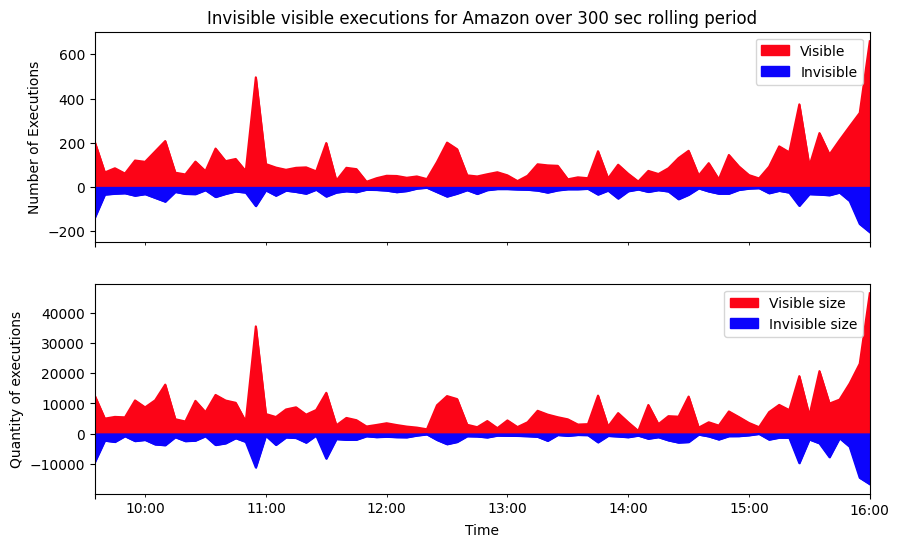

In [106]:
rsd_amzn=visible_invisible_plot(msg_book_amzn,"Amazon")

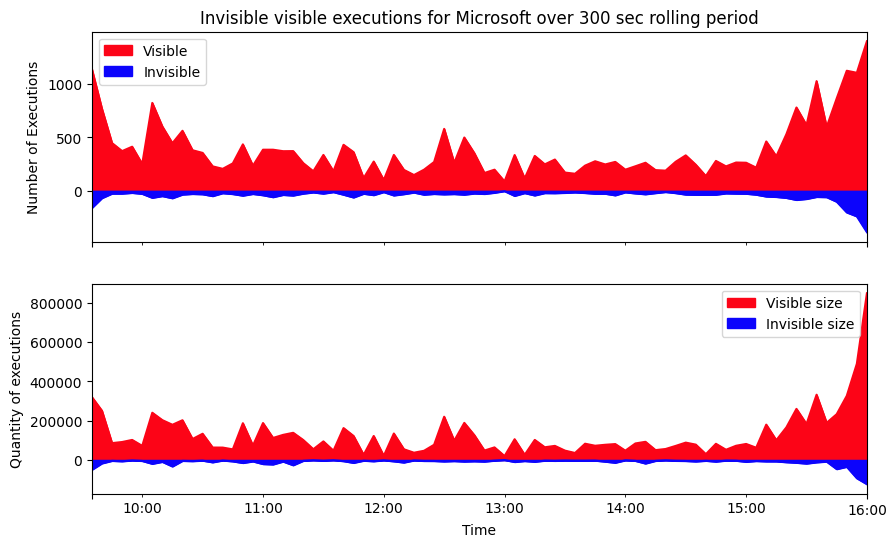

In [107]:
rsd_msft=visible_invisible_plot(msg_book_msft,"Microsoft")

Text(0.5, 1.0, 'Hidden order volume as % of total volume 5min rolling average')

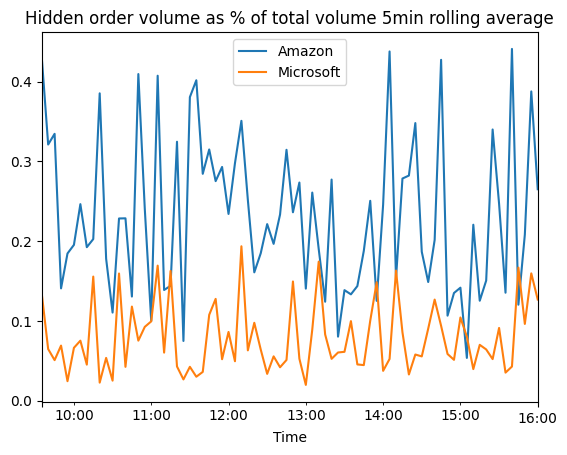

In [108]:
ax=(-1*rsd_amzn['Invisible size']/rsd_amzn['Size']).plot(label='Amazon')
(-1*rsd_msft['Invisible size']/rsd_msft['Size']).plot(ax=ax,label='Microsoft')
ax.legend()
ax.set_title('Hidden order volume as % of total volume 5min rolling average')

Now we are going to look at the order book data.

# Orderbook file information:
----------------------------------------------------------

  - Dimension:    (NumberEvents x (NumberLevels*4))

  - Structure:    Each row:
                  Ask price 1, Ask volume 1, Bid price 1,
                  Bid volume 1, Ask price 2, Ask volume 2,
                  Bid price 2, Bid volume 2, ...

  - Note:         Unoccupied bid (ask) price levels are
                  set to -9999999999 (9999999999) with volume 0.
				      
----------------------------------------------------------

In [109]:
def loadOrderBook(theMessageBook,ticker='AMZN'):
    #_____________________________________________________________________________
    #
    # Load Order Book File
    # This is going to output a dictionary of four dataframes - asks/bids prices/sizes
    #It will be indexed by the time index formed from the messagebook df
    #_____________________________________________________________________________
    nlevels = 10 #change number of levels

    # Load data
    theOrderBookFileName = ticker+"_2012-06-21_34200000_57600000_orderbook_10.csv"
    theOrderBookFileName=os.path.join(cwd,"data",theOrderBookFileName)
    print(theOrderBookFileName)

    col = ['Ask Price ','Ask Size ','Bid Price ','Bid Size ']
    theNames=[str(col_name)+str(level_no)  for level_no in range(1,nlevels+1) for col_name in col ]

    theOrderBook = pd.read_csv(theOrderBookFileName, names = theNames)
        
    #timeIndex = theMessageBook.index[(theMessageBook.Time >= startTrad) & (theMessageBook.Time <= endTrad)]
    #theOrderBookFiltered = theOrderBook[theOrderBook.index == timeIndex]
    
    theOrderBookFiltered = theOrderBook.iloc[theMessageBook.row_index]
    
    #theOrderBookFiltered=theOrderBookFiltered.set_index(pd.to_datetime(theMessageBook.Time,unit='s'))
    theOrderBookFiltered=theOrderBookFiltered.set_index(theMessageBook.index)
    
    # Convert prices into dollars
    #    Note: LOBSTER stores prices in dollar price times 10000

    col = ['Ask Price ','Ask Size ','Bid Price ','Bid Size ']

    #separate the four types of column into a dictionary with key=column type
    data_col_dic={c.strip():[c+str(level_no)  for level_no in range(1,nlevels+1)] for c in col}

    #separate data into four aligned dataframes of the four different types of data with key=data type
    data_dic={c:theOrderBookFiltered[cols] for c,cols in data_col_dic.items()}
      
    return data_dic

In [110]:
OB_dic_amzn=loadOrderBook(msg_book_amzn,ticker='AMZN')

OB_dic_msft=loadOrderBook(msg_book_msft,ticker='MSFT')

/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/AMZN_2012-06-21_34200000_57600000_orderbook_10.csv
/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/MSFT_2012-06-21_34200000_57600000_orderbook_10.csv


The output is a dictionary of dataframes. Each row of this dataset should refer to the orderbook state after a new event has happened. So it should be the same length. Let us check that.

In [111]:
def data_checker(OB_dic,msg_book):

    for k,val in OB_dic.items():
        
        assert val.shape[0]==msg_book.shape[0]
        print("ok!",k,type(val),val.shape)
    
data_checker(OB_dic_amzn,msg_book_amzn)
data_checker(OB_dic_msft,msg_book_msft)

ok! Ask Price <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Ask Size <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Bid Price <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Bid Size <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Ask Price <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Ask Size <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Bid Price <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Bid Size <class 'pandas.core.frame.DataFrame'> (668765, 10)


In [112]:
#Q6: check the structure of the data
#Q7: Compute bid, ask , mid-price, spread associated with each event.

In [113]:
OB_dic_msft

{'Ask Price':                                Ask Price 1  Ask Price 2  Ask Price 3  \
 Time                                                                   
 1970-01-01 09:30:00.013994120       309900       310500       310600   
 1970-01-01 09:30:00.013994120       309900       310500       310600   
 1970-01-01 09:30:00.015247805       309900       310400       310500   
 1970-01-01 09:30:00.015442111       309900       310400       310500   
 1970-01-01 09:30:00.015789148       309900       310400       310500   
 ...                                    ...          ...          ...   
 1970-01-01 15:59:59.861465727       301400       301500       301600   
 1970-01-01 15:59:59.861566671       301400       301500       301600   
 1970-01-01 15:59:59.873177404       301400       301500       301600   
 1970-01-01 15:59:59.907796528       301400       301500       301600   
 1970-01-01 15:59:59.907796528       301400       301500       301600   
 
                                Ask 

Using orderbook data we can compute for each event the associated spread, gap, mid-price for Amazon..


In [114]:
bid_prices=OB_dic_amzn['Bid Price']
ask_prices=OB_dic_amzn['Ask Price']
bid_prices

,Bid Price 1,Bid Price 2,Bid Price 3,Bid Price 4,Bid Price 5,Bid Price 6,Bid Price 7,Bid Price 8,Bid Price 9,Bid Price 10
Time,,,,,,,,,,
1970-01-01 09:30:00.017459617,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000,2189700
1970-01-01 09:30:00.189607670,2238100,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000
1970-01-01 09:30:00.189607670,2238100,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000
1970-01-01 09:30:00.189607670,2238100,2237500,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500
1970-01-01 09:30:00.189607670,2238100,2237500,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 15:59:59.872741285,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100
1970-01-01 15:59:59.903989046,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100
1970-01-01 15:59:59.955241980,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100


In [115]:
spread=ask_prices['Ask Price 1']- bid_prices['Bid Price 1']
gapA= -ask_prices['Ask Price 1']+ask_prices['Ask Price 2']
gapB= bid_prices['Bid Price 1']-bid_prices['Bid Price 2']
mid =(ask_prices['Ask Price 1']+ bid_prices['Bid Price 1'])/2
mid

Time
1970-01-01 09:30:00.017459617    2235650.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
                                   ...    
1970-01-01 15:59:59.872741285    2205650.0
1970-01-01 15:59:59.903989046    2205750.0
1970-01-01 15:59:59.955241980    2205750.0
1970-01-01 15:59:59.958244616    2205700.0
1970-01-01 15:59:59.959359650    2205750.0
Length: 269748, dtype: float64

In [116]:
def order_book_look(OB_dic,ticker,random_no=None):
    # Note: Pick a random row/event from the order book if not specified
    
    if random_no is None:
        random_no = OB_dic['Bid Size'].sample().index[0]
    else:
        #first appearing event after the given time
        random_no=OB_dic['Bid Size'][OB_dic['Bid Size'].index>random_no].index[0]
      
    time=random_no.strftime('%H:%M:%S:%f')

    #
    # Plot 1 - Snapshot of the Limit Order Book
    #_____________________________________________________________________________

    fig,ax=plt.subplots(2,1,figsize=(9,9)) 

    bid_data=OB_dic['Bid Size'].loc[random_no]
    bid_prices=OB_dic['Bid Price'].loc[random_no]

    ask_data=OB_dic['Ask Size'].loc[random_no]
    ask_prices=OB_dic['Ask Price'].loc[random_no]


    ax[0].bar(ask_prices/10000,ask_data,
           width=0.007, color='#fc1b04', label='Ask')   # Divide price by 10000 to get price in dollars
    ax[0].bar(bid_prices/10000,bid_data,
           width=0.007,color='#13fc04', label='Bid')

    ax[0].set_ylabel('Quantity')
    ax[0].set_xlabel('Price($)')
    ax[0].set_title(f'Order book at {str(time)} for {ticker}')
    #_____________________________________________________________________________
    #
    # Plot 2 - Relative Depth in the Limit Order Book
    #_____________________________________________________________________________
    # Plot variables
    ax[1].step(range(1,11,1),bid_data.cumsum()/bid_data.sum(),label='Bid',color='#13fc04')
    ax[1].step(range(1,11,1),-1*ask_data.cumsum()/ask_data.sum(),label='Ask',color='#fc1b04')

    ax[1].set_ylim(-1,1)
    ax[1].set_xlim(1,10)
    #ax[1].set_title('Relative Depth in the Limit Order Book for ' + ticker + ' at ' + str(time))
    ax[1].set_ylabel('% Orderbook')
    ax[1].set_xlabel('Level')
    
    return random_no

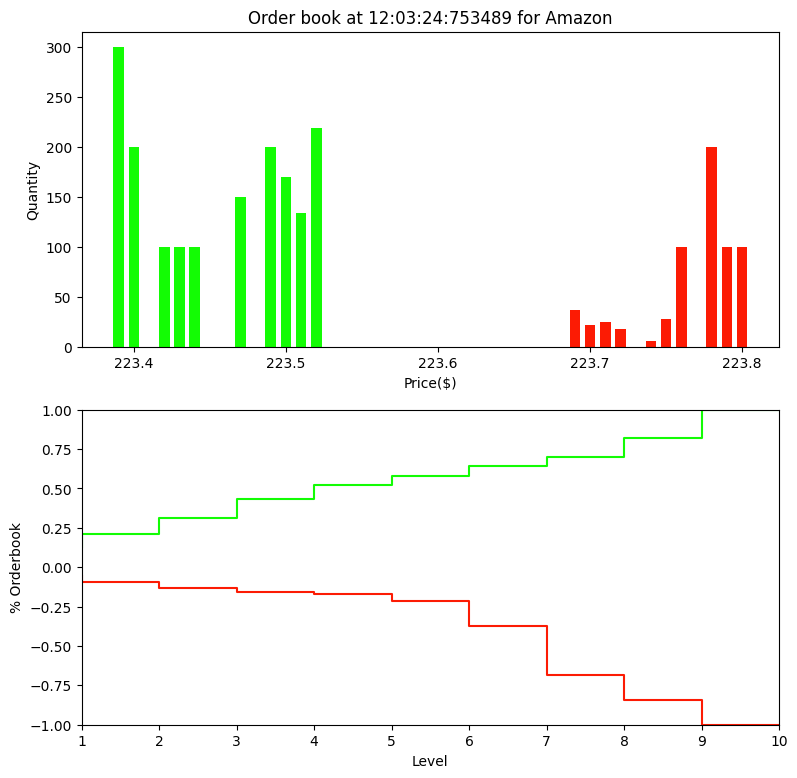

In [117]:
time=order_book_look(OB_dic_amzn,'Amazon')

Timestamp('1970-01-01 12:03:24.908488526')

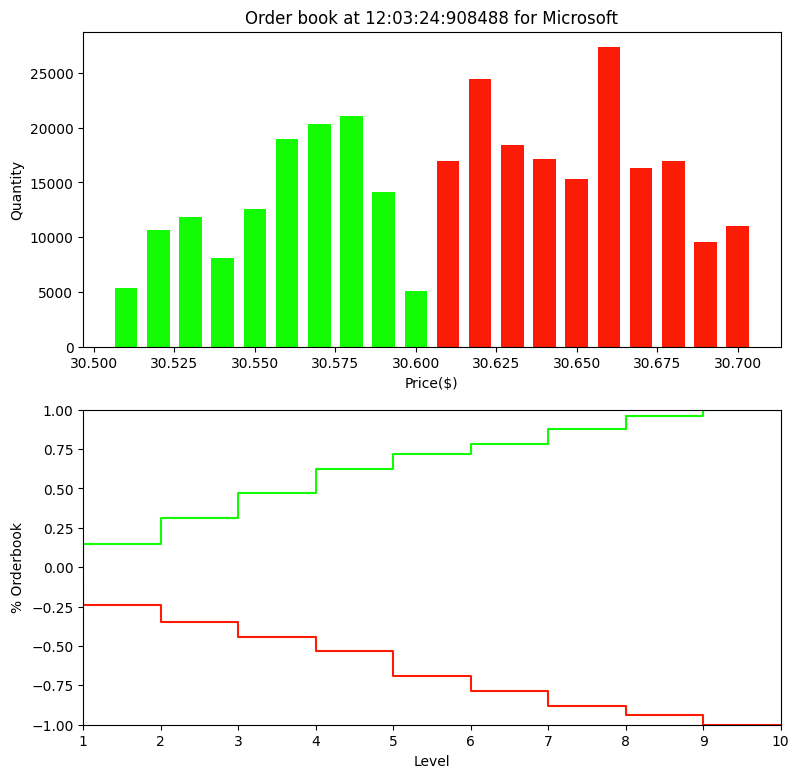

In [118]:
order_book_look(OB_dic_msft,'Microsoft',time)

# Event time vs time time

Event time is expressed as the sequence of events that occur in the limit order book. Sometimes it is convenient to think about of this as time instead of 'normal time'. 

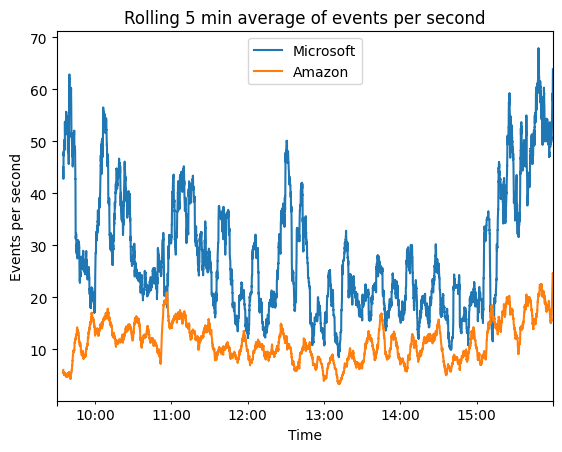

In [119]:
ax=msg_book_msft.resample("1s").count()['Time'].rolling(300).mean().plot(label='Microsoft',legend=True)
msg_book_amzn.resample("1s").count()['Time'].rolling(300).mean().plot(label='Amazon',legend=True,ax=ax,title='Rolling 5 min average of events per second')
_=ax.set_ylabel('Events per second')

Rolling average of events (all types of events here) per second...try selecting a sub-type (e.g. only executions)

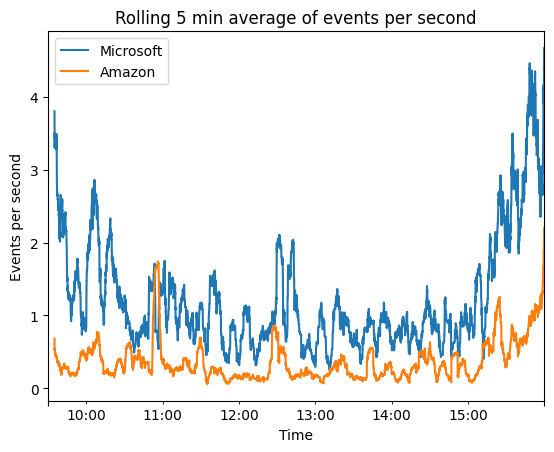

In [120]:
ax=msg_book_msft[msg_book_msft.Type==4].resample("1s").count()['Time'].rolling(300).mean().plot(label='Microsoft',legend=True)
msg_book_amzn[msg_book_amzn.Type==4].resample("1s").count()['Time'].rolling(300).mean().plot(label='Amazon',legend=True,ax=ax,title='Rolling 5 min average of events per second')
_=ax.set_ylabel('Events per second')

# Empirical properties of the LOB - large and small tick stocks

Now we are going to look at how a large tick stock - Microsoft differs from a small tick stock - Amazon.

In [121]:
def spread_plot(OB_dic,ticker,rolling_unit=2000):
    #This plots the spread at best varies over the day.

    spread=pd.DataFrame((OB_dic['Ask Price']['Ask Price 1']-OB_dic['Bid Price']['Bid Price 1']),columns=['spread'])
    #spread['normalised_spread_bps']=10000*0.5*spread['spread']/(OB_dic['Ask Price']['Ask Price 1']+OB_dic['Bid Price']['Bid Price 1'])

    
    ax=spread.plot()
    
    spread_res=spread.resample(str(rolling_unit)+'s',label='right').mean()
    spread_res.columns=[str(rolling_unit)+'s mavg']
    spread_res.plot(ax=ax,legend=True)
    
    ax.set_title(f'Spread over day of {ticker} in bps')
    
    myFmt=DateFormatter("%H:%m")
    ax.xaxis.set_major_formatter(myFmt)


    plt.figure(figsize=(8, 6))
    spread.hist(bins=50, alpha=0.75)
    plt.title(f'Spread Distribution of amz')
    plt.xlabel('Spread (Price Difference)')
    plt.ylabel('Frequency')
    plt.grid(False)

    
    return spread

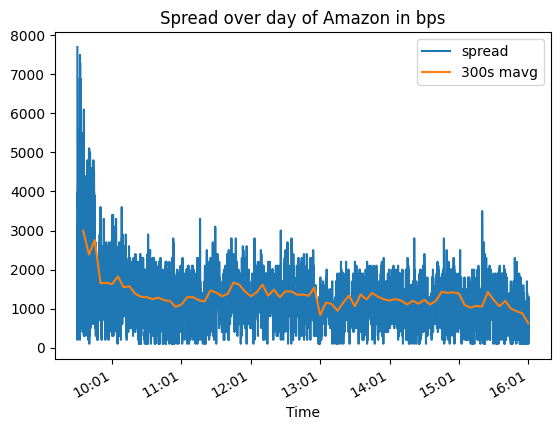

<Figure size 800x600 with 0 Axes>

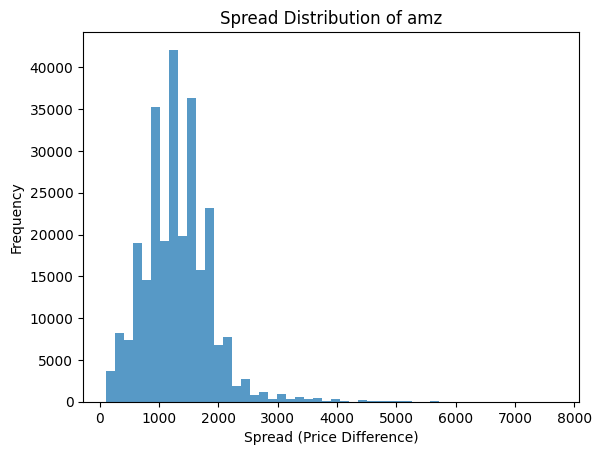

In [122]:
    
df=spread_plot(OB_dic_amzn,'Amazon',rolling_unit=300)

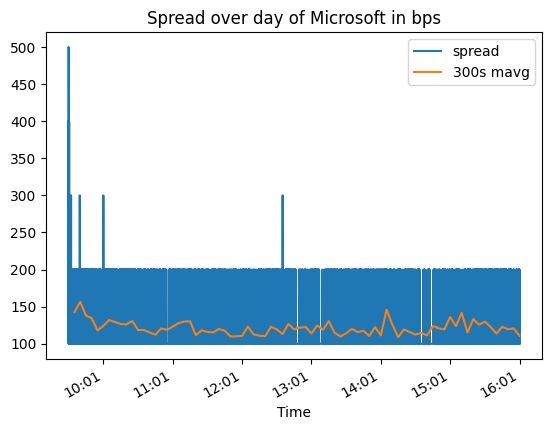

<Figure size 800x600 with 0 Axes>

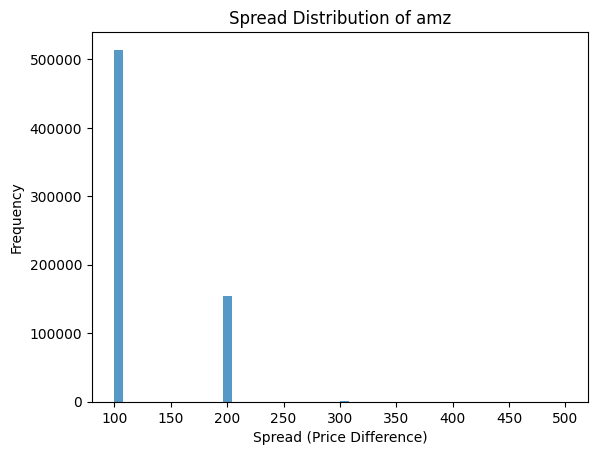

In [123]:
df=spread_plot(OB_dic_msft,'Microsoft',rolling_unit=300)

In [124]:
def spread_event_distribution_plot(OB_dic, ticker, rolling_unit=2000):
    # Calculate the spread (Ask Price - Bid Price)
    spread = pd.DataFrame((OB_dic['Ask Price']['Ask Price 1'] - OB_dic['Bid Price']['Bid Price 1']), columns=['spread'])

    # Identify times when there is a change in the best ask or bid prices
    ask_changes = OB_dic['Ask Price']['Ask Price 1'].diff().fillna(0) != 0
    bid_changes = OB_dic['Bid Price']['Bid Price 1'].diff().fillna(0) != 0

    # Combine the events where either ask or bid price changes
    events_at_best_quote = ask_changes | bid_changes

    # Filter the spread data for times when there's an event at the best quote
    spread_events = spread[events_at_best_quote]

    # Plot the spread distribution (histogram) at event times
    plt.figure(figsize=(8, 6))
    spread_events.hist(bins=50, alpha=0.75)
    plt.title(f'Spread Distribution at Best Quote Events for {ticker}')
    plt.xlabel('Spread (Price Difference)')
    plt.ylabel('Frequency')
    plt.grid(False)
    
    plt.tight_layout()
    
    # Optionally, plot the spread over time, highlighting event moments
    ax = spread.plot(figsize=(12, 6), title=f'Spread over the day of {ticker}')
    ax.set_ylabel('Spread (Price Difference)')
    
    # Resample the spread data to a rolling average based on 'rolling_unit'
    spread_res = spread.resample(str(rolling_unit) + 's', label='right').mean()
    spread_res.columns = [str(rolling_unit) + 's mavg']
    spread_res.plot(ax=ax, legend=True)

    # Highlight event times on the plot
    ax.scatter(spread_events.index, spread_events['spread'], color='red', label='Events at Best Quote')
    
    # Set x-axis formatting for time
    myFmt = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(myFmt)

    return spread_events


<Figure size 800x600 with 0 Axes>

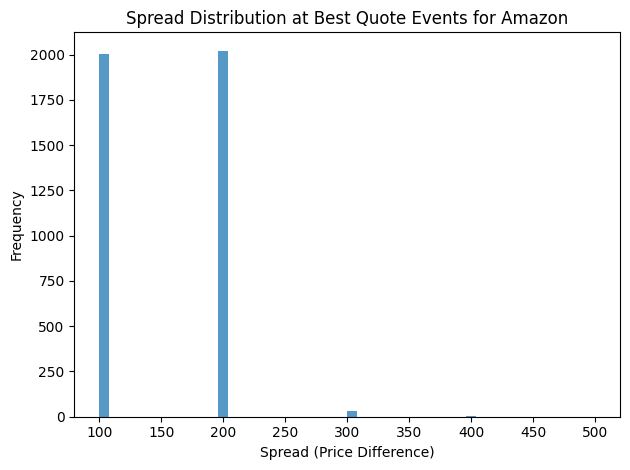

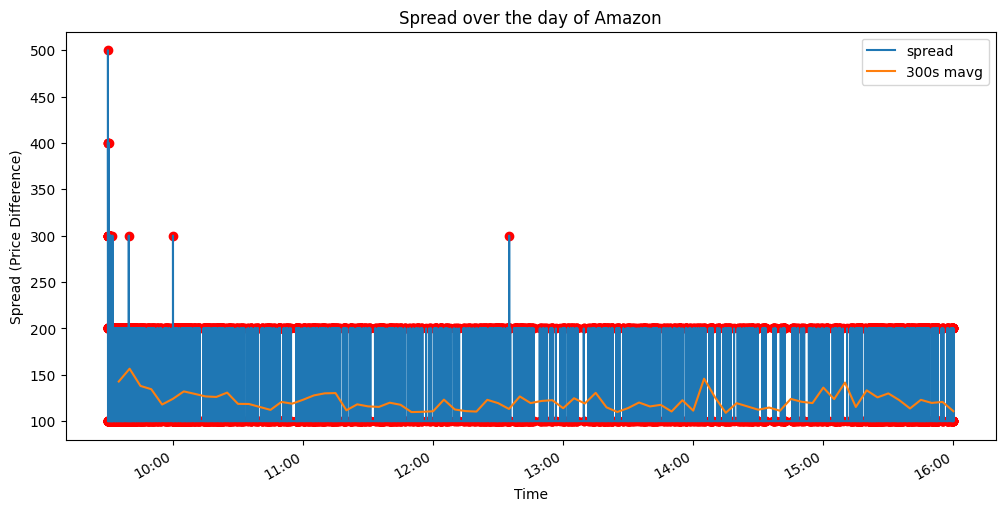

In [125]:
spread_events = spread_event_distribution_plot(OB_dic_msft,'Amazon',rolling_unit=300)

In [126]:
def depth_at_best_plot(OB_dic,ticker,events=2000,resample_per=300):
    
    
    depth=pd.DataFrame(OB_dic['Ask Size']['Ask Size 1'])
    depth.columns=['Best ask depth']
    
    #average of last 2000 quotes - might not be time consistent
    
    depth[str(events)+ ' event mavg']=depth.rolling(events).mean()
    ax=depth.plot()
    
    res_per=str(resample_per)+'s'
    depth_res=depth.resample(res_per,label='right').mean()
    depth_res.columns=[res_per+ ' mavg','_']
    depth_res[res_per+ ' mavg'].plot(ax=ax,legend=True)

    ax.set_title(f'Depth over day of {ticker}')
    ax.set_ylabel('Shares')
    
    return depth_res 

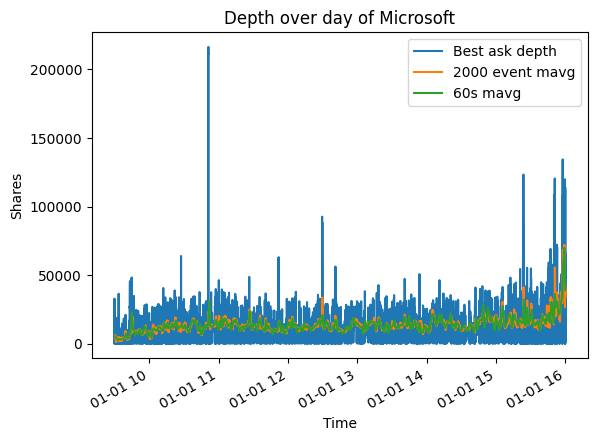

In [127]:
df=depth_at_best_plot(OB_dic_msft,'Microsoft',events=2000,resample_per=60)

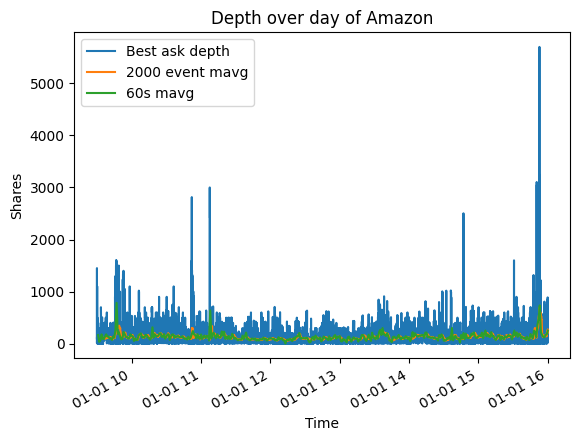

In [128]:
df=depth_at_best_plot(OB_dic_amzn,'Amazon',events=2000,resample_per=60)

In [129]:
def plot_net_limit_orders(msg_book,ticker):

    #filter out executions to leave LOs, cancels and deletes
    net_limit_orders=msg_book[msg_book.Type.isin([1,2,3])]
    
    net_limit_orders=net_limit_orders.set_index(pd.to_datetime(net_limit_orders.Time,unit='s'))
    
    #create a column =1 if a LO and  -1 if a delete cancel
    net_limit_orders['accrete_deplete']=net_limit_orders.Type.map({1:1,2:-1,3:-1})
    #multiply with quantity to get signed LO quantity
    net_limit_orders['signed_size']=net_limit_orders['accrete_deplete']*net_limit_orders['Size']
    #    Note: LOBSTER stores prices in dollar price times 10000
    net_limit_orders['signed_volume']=net_limit_orders['signed_size']*net_limit_orders['Price']/10000

    #resample time series into 5 minute intervals, sum over each 5 minutes, units of US$m and plot
    ax=(net_limit_orders.signed_volume.resample('300s',label='right').sum()/1000000).plot()
    ax.set_title(f"Net limit orders {ticker}")
    ax.set_ylabel('5 min LO net volume (m$)')
    

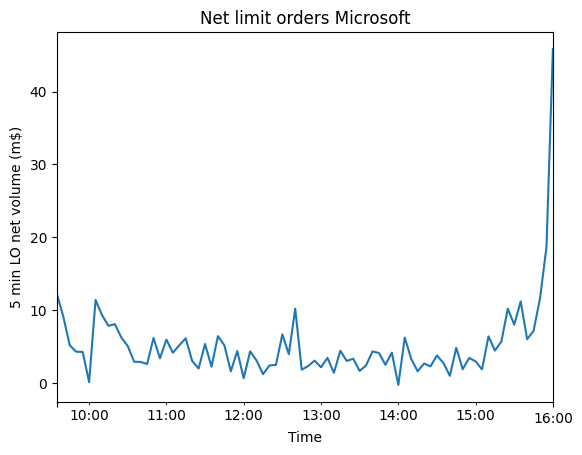

In [130]:
plot_net_limit_orders(msg_book_msft,"Microsoft")

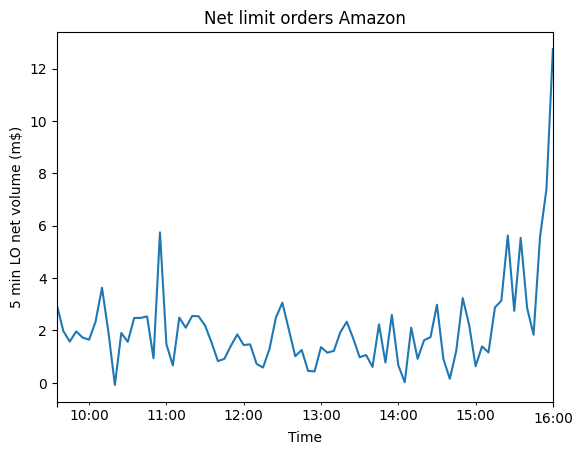

In [131]:
plot_net_limit_orders(msg_book_amzn,"Amazon")

# Event rates in the LOB

In [132]:
#get all of the LO submissions

def abs_dist(price,side,best_ask,best_bid):
    #little function to get absolute distance to best depending on order type
    if side==1:
        return best_bid-price
    elif side==-1:
        return price-best_ask



def event_rate(msg_book,OB_dic,Type=1):
    events=msg_book[msg_book.Type.isin([1])]
    
    #get the raw information we need from the Orderbook (Best bid and ask events)
    Best_state=pd.DataFrame({'Best_bid':OB_dic['Bid Price']['Bid Price 1'],
                             'Best_ask':OB_dic['Ask Price']['Ask Price 1']})
    
    #we want to know the state of the order book before submission of an order
    Best_state['prev_Best_bid']=Best_state.Best_bid.shift(1)
    Best_state['prev_Best_ask']=Best_state.Best_ask.shift(1)
    Best_state.fillna(0,inplace=True)

    #not necessary but this column return true if the best bid/ask has improved
    Best_state['Bid_improved']=Best_state['Best_bid']>Best_state['prev_Best_bid']
    Best_state['Ask_improved']=Best_state['Best_ask']<Best_state['prev_Best_ask']
    
    #merge the order book information with the message information    
        #events=events.merge(Best_state.iloc[events.row_index],left_on='row_index',right_on='row_index')
    #prefer concat because we know the rows are aligned. merge may get into trouble for simultaneous events.
    events=pd.concat([events,Best_state.iloc[events.row_index]],sort=False,axis=1)
    
    #apply absolute distance calculation row by row. 
    #This is slow way to do it but 
    events['abs_dist']=events.apply(lambda x: abs_dist(x['Price'],x['TradeDirection'],x['prev_Best_ask'],
                                                       x['prev_Best_bid']),axis=1 )
    
    
    
    return events


This is this the distribution of LO submissions wrt their absolute distance from best.

<Axes: >

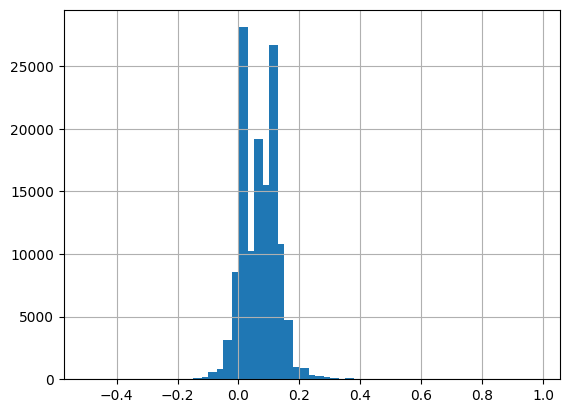

In [133]:
events_amzn=event_rate(msg_book_amzn,OB_dic_amzn,1)
(events_amzn['abs_dist']/10000).hist(bins=np.arange(-.5,1,0.025).round(2))

<Axes: >

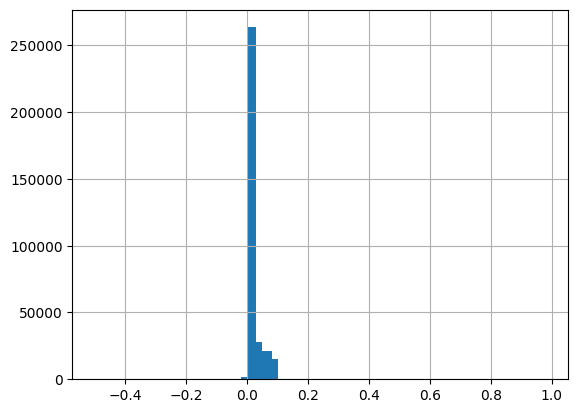

In [134]:
events_msft=event_rate(msg_book_msft,OB_dic_msft,1)
(events_msft['abs_dist']/10000).hist(bins=np.arange(-.5,1,0.025).round(2))

Note that there are LOs with negative absolute distance? These are best improving orders (bid above best or ask below)

In [135]:
bi=(events_msft.Bid_improved | events_msft.Ask_improved).value_counts()
bi/bi.sum()

False    0.993843
True     0.006157
Name: count, dtype: float64

In [136]:
bi=events_amzn.Bid_improved.value_counts()
bi/bi.sum()

Bid_improved
False    0.949899
True     0.050101
Name: count, dtype: float64

## Merging Files 

Orderbook and message file have the same dimensions (row-wise)

In [137]:
msg_book_amzn

,Time,Type,OrderID,Size,Price,TradeDirection,row_index
Time,,,,,,,
1970-01-01 09:30:00.017459617,34200.017460,5,0,1,2238200,-1,0
1970-01-01 09:30:00.189607670,34200.189608,1,11885113,21,2238100,1,1
1970-01-01 09:30:00.189607670,34200.189608,1,3911376,20,2239600,-1,2
1970-01-01 09:30:00.189607670,34200.189608,1,11534792,100,2237500,1,3
1970-01-01 09:30:00.189607670,34200.189608,1,1365373,13,2240000,-1,4
...,...,...,...,...,...,...,...
1970-01-01 15:59:59.872741285,57599.872741,3,286560364,100,2207600,-1,269743
1970-01-01 15:59:59.903989046,57599.903989,3,287142900,100,2206200,-1,269744
1970-01-01 15:59:59.955241980,57599.955242,3,286967592,170,2206900,-1,269745


In [138]:
OB_dic_amzn['Ask Price']

,Ask Price 1,Ask Price 2,Ask Price 3,Ask Price 4,Ask Price 5,Ask Price 6,Ask Price 7,Ask Price 8,Ask Price 9,Ask Price 10
Time,,,,,,,,,,
1970-01-01 09:30:00.017459617,2239500,2239900,2240000,2242500,2244000,2245400,2248900,2267700,2294300,2298000
1970-01-01 09:30:00.189607670,2239500,2239900,2240000,2242500,2244000,2245400,2248900,2267700,2294300,2298000
1970-01-01 09:30:00.189607670,2239500,2239600,2239900,2240000,2242500,2244000,2245400,2248900,2267700,2294300
1970-01-01 09:30:00.189607670,2239500,2239600,2239900,2240000,2242500,2244000,2245400,2248900,2267700,2294300
1970-01-01 09:30:00.189607670,2239500,2239600,2239900,2240000,2242500,2244000,2245400,2248900,2267700,2294300
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 15:59:59.872741285,2206200,2206400,2206500,2206700,2206900,2207100,2207400,2207500,2207600,2207900
1970-01-01 15:59:59.903989046,2206400,2206500,2206700,2206900,2207100,2207400,2207500,2207600,2207900,2208000
1970-01-01 15:59:59.955241980,2206400,2206500,2206700,2207100,2207400,2207500,2207600,2207900,2208000,2208100


In [139]:
def inter_prices_sizes(prices_df, sizes_df, side='Bid'):
    """
    Interleave price and size columns.
    """
    n_levels = prices_df.shape[1]
    columns = []
    for i in range(n_levels):
        price_col = prices_df.iloc[:, i]
        size_col = sizes_df.iloc[:, i]
        pair_df = pd.concat([price_col, size_col], axis=1)
        pair_df.columns = [f"{side} Price {i+1}", f"{side} Volume {i+1}"]
        columns.append(pair_df)
    return pd.concat(columns, axis=1)

In [140]:
# Interleave bid and ask sides
bid_df = inter_prices_sizes(OB_dic_amzn['Bid Price'], OB_dic_amzn['Bid Size'], side='Bid')
ask_df = inter_prices_sizes(OB_dic_amzn['Ask Price'], OB_dic_amzn['Ask Size'], side='Ask')

# Final full order book DataFrame
lob_df = pd.concat([bid_df, ask_df], axis=1)

# Merge with message data
merged_df = pd.concat([msg_book_amzn.reset_index(drop=True),
                       lob_df.reset_index(drop=True)], axis=1)


In [141]:
# Interleave bid and ask sides
bid_df = inter_prices_sizes(OB_dic_msft['Bid Price'], OB_dic_msft['Bid Size'], side='Bid')
ask_df = inter_prices_sizes(OB_dic_msft['Ask Price'], OB_dic_msft['Ask Size'], side='Ask')

# Final full order book DataFrame
lob_df = pd.concat([bid_df, ask_df], axis=1)

# Merge with message data
merged_df = pd.concat([msg_book_msft.reset_index(drop=True),
                       lob_df.reset_index(drop=True)], axis=1)

In [142]:
merged_df 

,Time,Type,OrderID,Size,Price,TradeDirection,row_index,Bid Price 1,Bid Volume 1,Bid Price 2,...,Ask Price 6,Ask Volume 6,Ask Price 7,Ask Volume 7,Ask Price 8,Ask Volume 8,Ask Price 9,Ask Volume 9,Ask Price 10,Ask Volume 10
0,34200.013994,3,16085616,100,310400,-1,0,309500,300,309300,...,310900,9348,311000,1800,311100,4500,311300,100,311400,100
1,34200.013994,1,16116348,100,310500,-1,1,309500,300,309300,...,310900,9348,311000,1800,311100,4500,311300,100,311400,100
2,34200.015248,1,16116658,100,310400,-1,2,309500,300,309300,...,310800,200,310900,9348,311000,1800,311100,4500,311300,100
3,34200.015442,1,16116704,100,310500,-1,3,309500,300,309300,...,310800,200,310900,9348,311000,1800,311100,4500,311300,100
4,34200.015789,1,16116752,100,310600,-1,4,309500,300,309300,...,310800,200,310900,9348,311000,1800,311100,4500,311300,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668760,57599.861466,3,287081309,9249,301400,-1,668760,301300,50426,301200,...,301900,30006,302000,72106,302100,56700,302200,36532,302300,31600
668761,57599.861567,3,287117122,783,301400,-1,668761,301300,50426,301200,...,301900,30006,302000,72106,302100,56700,302200,36532,302300,31600
668762,57599.873177,3,287070525,800,301500,-1,668762,301300,50426,301200,...,301900,30006,302000,72106,302100,56700,302200,36532,302300,31600
668763,57599.907797,5,0,100,301350,-1,668763,301300,50426,301200,...,301900,30006,302000,72106,302100,56700,302200,36532,302300,31600


In [143]:
merged_df['Spread']=pd.DataFrame((merged_df['Ask Price 1']-merged_df['Bid Price 1']))

In [144]:
merged_df

,Time,Type,OrderID,Size,Price,TradeDirection,row_index,Bid Price 1,Bid Volume 1,Bid Price 2,...,Ask Volume 6,Ask Price 7,Ask Volume 7,Ask Price 8,Ask Volume 8,Ask Price 9,Ask Volume 9,Ask Price 10,Ask Volume 10,Spread
0,34200.013994,3,16085616,100,310400,-1,0,309500,300,309300,...,9348,311000,1800,311100,4500,311300,100,311400,100,400
1,34200.013994,1,16116348,100,310500,-1,1,309500,300,309300,...,9348,311000,1800,311100,4500,311300,100,311400,100,400
2,34200.015248,1,16116658,100,310400,-1,2,309500,300,309300,...,200,310900,9348,311000,1800,311100,4500,311300,100,400
3,34200.015442,1,16116704,100,310500,-1,3,309500,300,309300,...,200,310900,9348,311000,1800,311100,4500,311300,100,400
4,34200.015789,1,16116752,100,310600,-1,4,309500,300,309300,...,200,310900,9348,311000,1800,311100,4500,311300,100,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668760,57599.861466,3,287081309,9249,301400,-1,668760,301300,50426,301200,...,30006,302000,72106,302100,56700,302200,36532,302300,31600,100
668761,57599.861567,3,287117122,783,301400,-1,668761,301300,50426,301200,...,30006,302000,72106,302100,56700,302200,36532,302300,31600,100
668762,57599.873177,3,287070525,800,301500,-1,668762,301300,50426,301200,...,30006,302000,72106,302100,56700,302200,36532,302300,31600,100
668763,57599.907797,5,0,100,301350,-1,668763,301300,50426,301200,...,30006,302000,72106,302100,56700,302200,36532,302300,31600,100


## Spread distribution

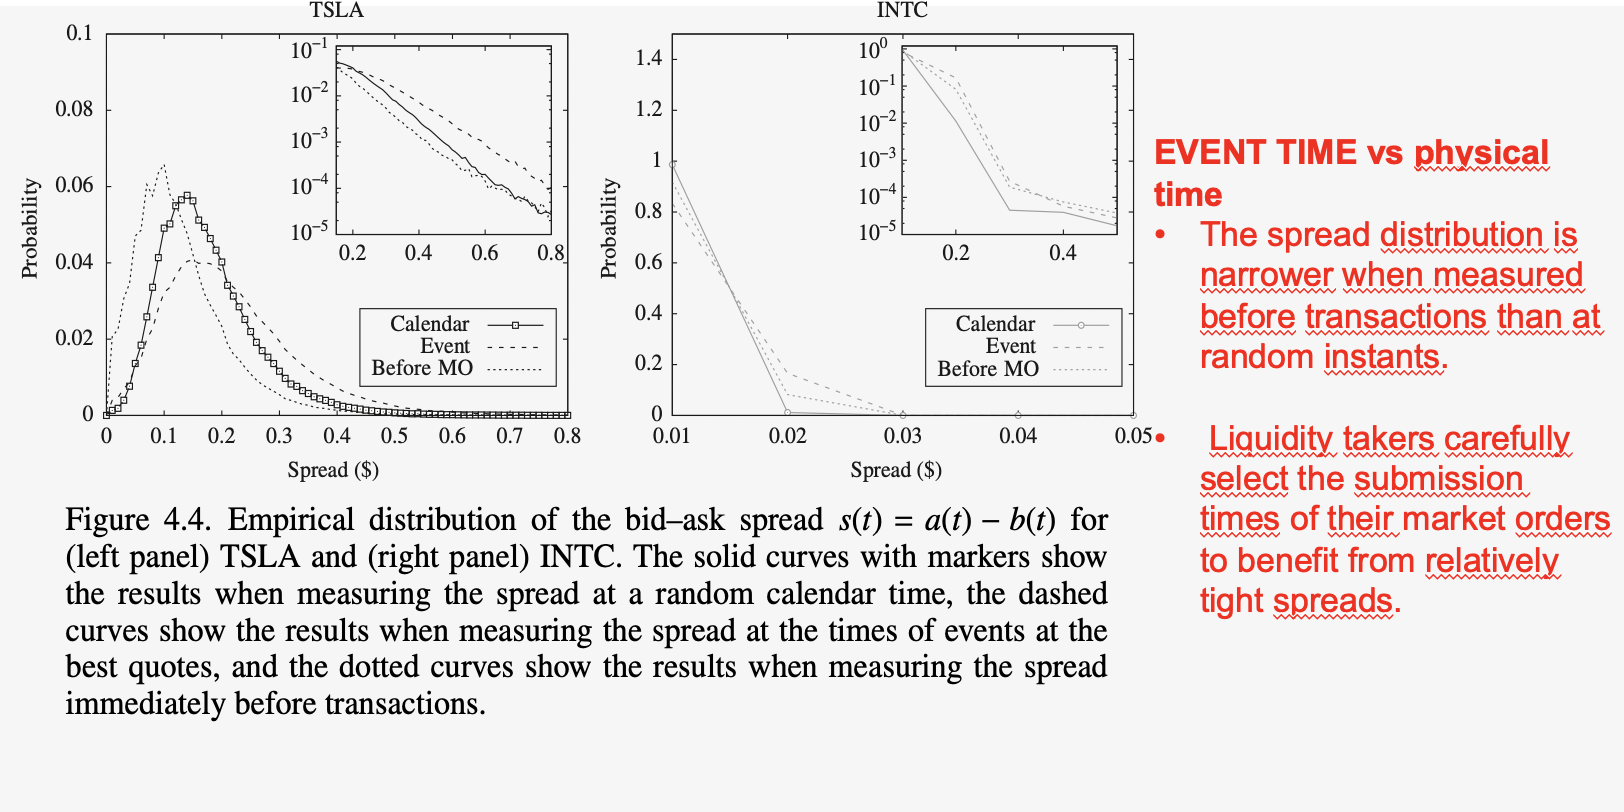

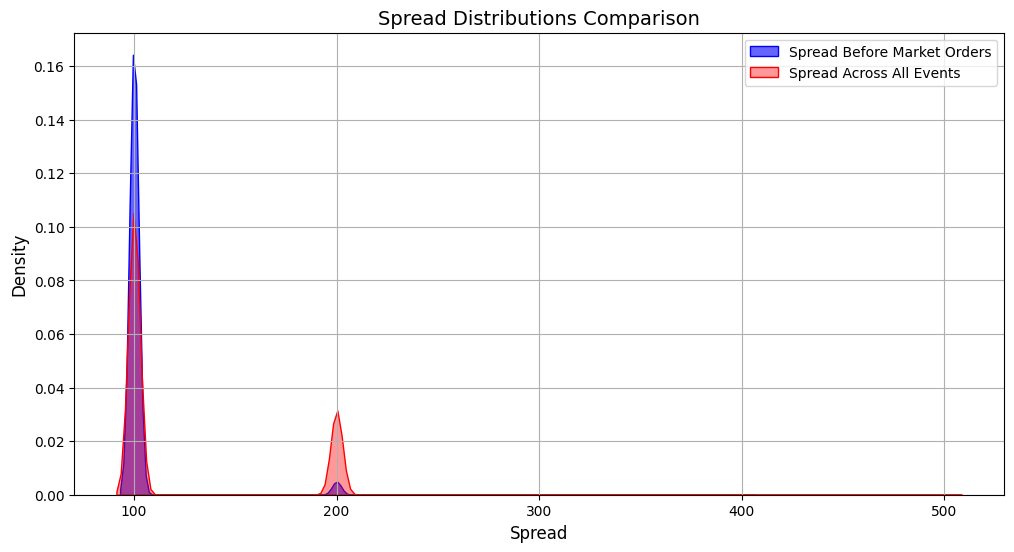

In [149]:
market_order_indices = merged_df[merged_df['Type'] == 4].index

# Get the spread immediately before market order executions
pre_market_order_spreads = merged_df.loc[market_order_indices - 1, 'Spread']
atMO = merged_df.loc[market_order_indices, 'Spread']

# Step 3: Plot and Compare Distributions
plt.figure(figsize=(12, 6))

# Plot distribution of spreads before market order executions
sns.kdeplot(pre_market_order_spreads, label='Spread Before Market Orders', fill=True, alpha=0.6, color='blue')

# Plot distribution of spreads across all events
sns.kdeplot(merged_df['Spread'], label='Spread Across All Events', fill=True, alpha=0.4, color='red')

plt.title('Spread Distributions Comparison', fontsize=14)
plt.xlabel('Spread', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid()
plt.show()

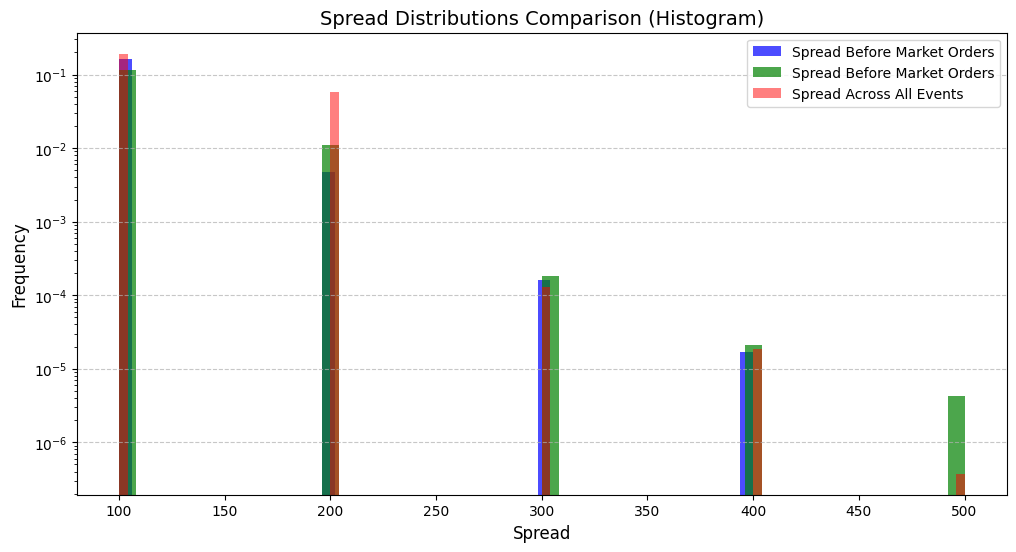

Standard Deviation of Spreads (All Events): 42.3907
Standard Deviation of Spreads (Before Market Orders): 17.9590
The spread distribution before market orders is tighter.


In [146]:
# Step 3: Plot and Compare Distributions using Histograms
plt.figure(figsize=(12, 6))

# Plot histogram of spreads before market order executions
plt.hist(pre_market_order_spreads.dropna(), bins=50, alpha=0.7, color='blue', label='Spread Before Market Orders', density=True, log=True)
plt.hist(atMO.dropna(), bins=50, alpha=0.7, color='green', label='Spread Before Market Orders',density=True, log=True)

# Plot histogram of spreads across all events
plt.hist(merged_df['Spread'].dropna(), bins=100, alpha=0.5, color='red', label='Spread Across All Events', density=True,log=True)

plt.title('Spread Distributions Comparison (Histogram)', fontsize=14)
plt.xlabel('Spread', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4: Check Tightness of Distribution
std_all = merged_df['Spread'].std()
std_pre_mo = pre_market_order_spreads.std()

print(f"Standard Deviation of Spreads (All Events): {std_all:.4f}")
print(f"Standard Deviation of Spreads (Before Market Orders): {std_pre_mo:.4f}")
if std_pre_mo < std_all:
    print("The spread distribution before market orders is tighter.")
else:
    print("The spread distribution before market orders is not tighter.")

## Actual LOB depth

In [147]:
def compute_actual_lob_depth_in_ticks(df, tick_size=100):
    """
    Compute LOB depth (price levels 1 to 10) in tick units.

    Parameters:
        df (pd.DataFrame): LOBSTER DataFrame with Ask/Bid Price 1-10
        tick_size (int): Price unit per tick (e.g., 100 = $0.01)

    Returns:
        DataFrame with depth_ask and depth_bid in ticks
    """
    depth_ask_ticks = (df['Ask Price 10'] - df['Ask Price 1']) / tick_size
    depth_bid_ticks = (df['Bid Price 1'] - df['Bid Price 10']) / tick_size

    return pd.DataFrame({'depth_ask': depth_ask_ticks, 'depth_bid': depth_bid_ticks})

Average Ask Depth (in ticks): 9.000351393987424
Average Bid Depth (in ticks): 9.000263171667177


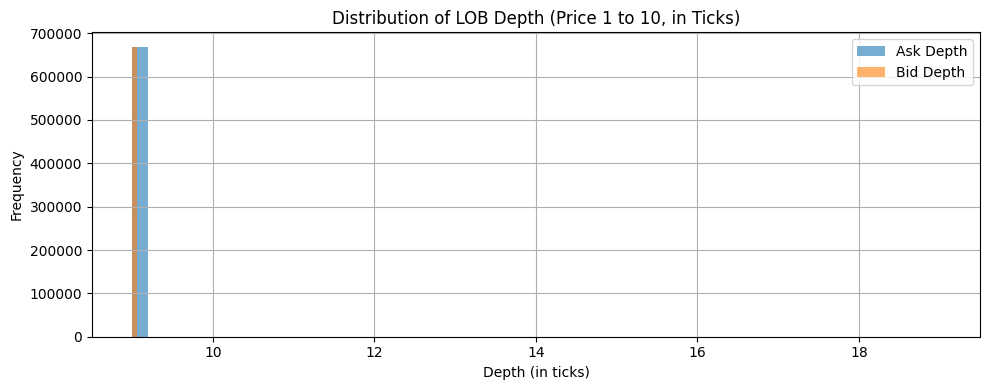

In [148]:
tick_size = 100  # ← Set your actual tick size
depth_df = compute_actual_lob_depth_in_ticks(merged_df, tick_size=tick_size)

# Print average depths in ticks
print("Average Ask Depth (in ticks):", depth_df['depth_ask'].mean())
print("Average Bid Depth (in ticks):", depth_df['depth_bid'].mean())

# Plot histogram
plt.figure(figsize=(10,4))
plt.hist(depth_df['depth_ask'], bins=50, alpha=0.6, label='Ask Depth')
plt.hist(depth_df['depth_bid'], bins=50, alpha=0.6, label='Bid Depth')
plt.xlabel('Depth (in ticks)')
plt.ylabel('Frequency')
plt.title('Distribution of LOB Depth (Price 1 to 10, in Ticks)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Compute:

1. relative tick size:
    \tao = 'tao/trading_day_mean

2. spread of what?

## Q1. 

for the list of: TSLA, BAC, GOOG, AAPL at the 10 step level and AMZ at the 50 


In [136]:
def order_data(OrderPath = '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/TSLA_2025-10-06_34200000_57600000_orderbook_10.csv', MessagePath = '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/TSLA_2025-10-06_34200000_57600000_message_10.csv'):    
    nlevels = 10
    col = ['Ask Price ','Ask Size ','Bid Price ','Bid Size ']
    colnames=[str(col_name)+str(level_no)  for level_no in range(1,nlevels+1) for col_name in col ]
    tsla_snapshot = pd.read_csv(OrderPath, names = colnames)
    msg_book = pd.read_csv(MessagePath, names = ['Time','Type','OrderID','Size','Price','TradeDirection'], usecols=range(6))
    msg_book=msg_book.set_index(pd.to_datetime(msg_book.Time,unit='s'))
    tsla_snapshot=tsla_snapshot.set_index(msg_book.index)
    return tsla_snapshot
    
tsla_snapshot = order_data()
orderpaths = ['/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/MSFT_2012-06-21_34200000_57600000_orderbook_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/GOOG_2025-10-06_34200000_57600000_orderbook_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/BAC_2025-10-06_34200000_57600000_orderbook_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/AMZN_2012-06-21_34200000_57600000_orderbook_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/AAPL_2025-10-06_34200000_57600000_orderbook_10.csv']
names = ['msft_snapshot','goog_snapshot','bac_snapshot','amzn_snapshot', 'appl_snapshot']
messagepaths = ['/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/MSFT_2012-06-21_34200000_57600000_message_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/GOOG_2025-10-06_34200000_57600000_message_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/BAC_2025-10-06_34200000_57600000_message_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/AMZN_2012-06-21_34200000_57600000_message_10.csv', '/Users/Matthew/Desktop/repositories/microstructure/Lab 1/OneDrive_1_17-10-2025/data/AAPL_2025-10-06_34200000_57600000_message_10.csv']
snapshots = {}
for opath, mpath, name in zip(orderpaths, messagepaths, names):
    snapshots[name] = order_data(opath, mpath)
    print(snapshots[name].head())

                               Ask Price 1  Ask Size 1  Bid Price 1  \
Time                                                                  
1970-01-01 09:30:00.013994120       309900        3788       309500   
1970-01-01 09:30:00.013994120       309900        3788       309500   
1970-01-01 09:30:00.015247805       309900        3788       309500   
1970-01-01 09:30:00.015442111       309900        3788       309500   
1970-01-01 09:30:00.015789148       309900        3788       309500   

                               Bid Size 1  Ask Price 2  Ask Size 2  \
Time                                                                 
1970-01-01 09:30:00.013994120         300       310500         100   
1970-01-01 09:30:00.013994120         300       310500         200   
1970-01-01 09:30:00.015247805         300       310400         100   
1970-01-01 09:30:00.015442111         300       310400         100   
1970-01-01 09:30:00.015789148         300       310400         100   

           

In [135]:
for name in names:
    snapshots[f'{name}'+'10'] = snapshots[name].iloc[10]
    print(snapshots[f'{name}'+'10'])

309200
2455600
506700
2236500
2578300


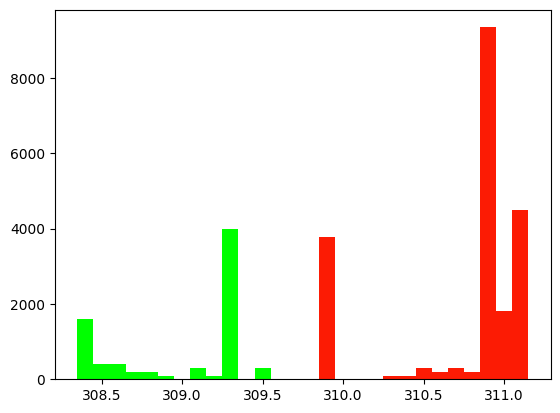

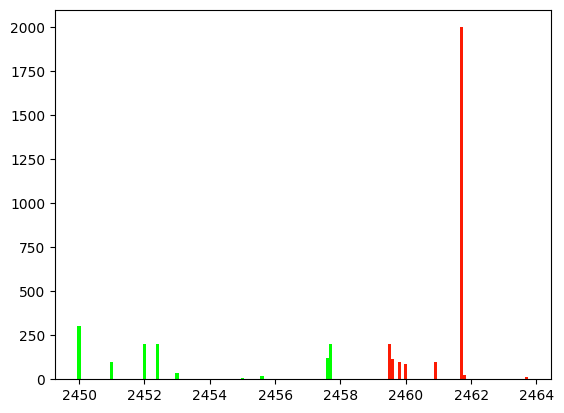

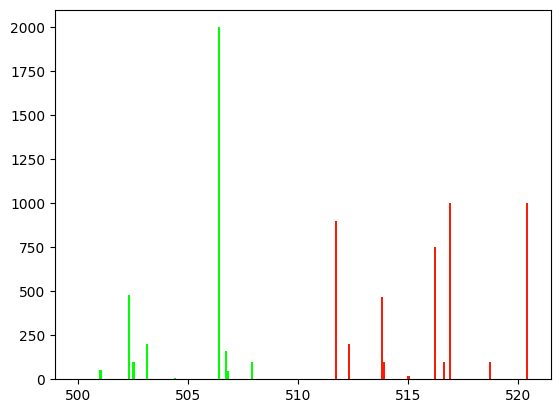

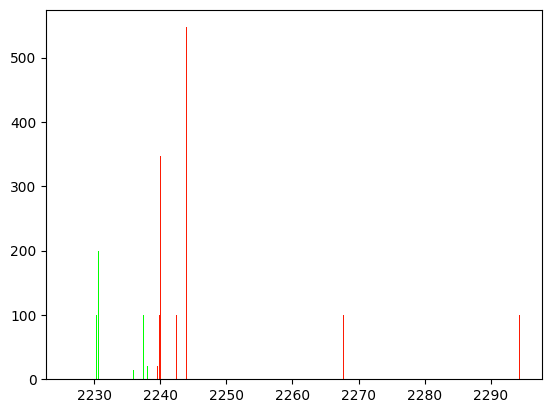

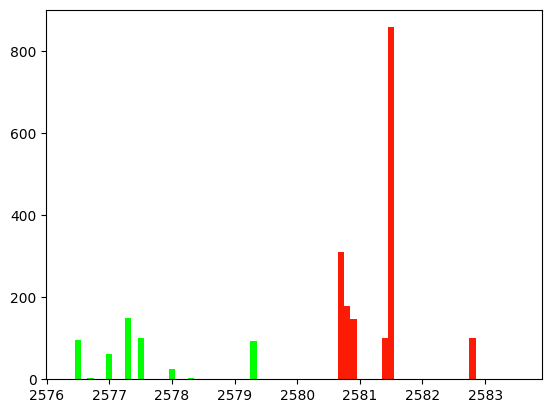

In [127]:
def plotting_lob(df):
    askprices = df.iloc[0::4]
    askvolumes = df.iloc[1::4]
    bidprices = df.iloc[2::4]
    bidvolumes = df.iloc[3::4]
    plt.bar(askprices/1000, askvolumes,width=1/10, color='#fc1b04', label='Ask')
    plt.bar(bidprices/1000, bidvolumes,width=1/10, color='lime', label='bid')   # Divide price by 10000 to get price in dollars
    return plt.show()
for name in names:
    plotting_lob(snapshots[name])


In [86]:
# total traded volume
volumes = msg_book_tsla.groupby('Type')['Size'].sum()
total_vol = volumes[2:5].sum()
print(total_vol)
print(volumes )

39281113
Type
1    33362802
2       79603
3    24455266
4    10388650
5     4437197
6      394792
Name: Size, dtype: int64


# Q2. Metrics for small/large tic
Average relative spread \
% time spent one tick away \
Quoted depth at best

In [170]:
# Average relative spread

"""
Compute relative tick size tick/midprice
"""

def relative_tic_size(df):
    midprice = ((df['Ask Price 1'] + df['Bid Price 1']) / 2).mean()
    relative_tic = 1000/midprice
    return relative_tic

def average_relative_spread(df):
    relative_tic = relative_tic_size(df)
    spread = (df['Ask Price 1'] - df['Bid Price 1']).mean()
    avg_rel_spread = spread/(relative_tic*10000)
    return avg_rel_spread

for name in names:
    print(f'The relative tick size for {name} is {relative_tic_size(snapshots[name])} and the average relative spread is {average_relative_spread(snapshots[name])}')

The relative tick size for msft_snapshot is 0.003273435404392511 and the average relative spread is 3.7637603727240054
The relative tick size for goog_snapshot is 0.00040204839376274773 and the average relative spread is 88.80982451558414
The relative tick size for bac_snapshot is 0.0019802911509221835 and the average relative spread is 6.363417118344025
The relative tick size for amzn_snapshot is 0.0004489997807068812 and the average relative spread is 291.45157471968923
The relative tick size for appl_snapshot is 0.00038925411790675685 and the average relative spread is 67.44694203949747


In [161]:
# % time one tick away

# time between this and next timestamp when only one tick away
def one_tic_tok(df):
    spread = df['Ask Price 1'] - df['Bid Price 1']
    
    mask = spread == 100   # 1 tick condition
    
    dt = df.index.diff()   # Time_t - Time_{t-1}
    
    return dt[mask].sum()
for name in names:
    print(f'the time spent in {name} at a one tick spread was {one_tic_tok(snapshots[name])} which is {one_tic_tok(snapshots[name]).total_seconds()*100/(6.5 * 60 * 60)} %')
    

the time spent in msft_snapshot at a one tick spread was 0 days 06:25:59.804162687 which is 98.97352205982905 %
the time spent in goog_snapshot at a one tick spread was 0 days 00:12:44.060094443 which is 3.2652140769230775 %
the time spent in bac_snapshot at a one tick spread was 0 days 06:06:24.172347493 which is 93.94945447435897 %
the time spent in amzn_snapshot at a one tick spread was 0 days 00:01:02.565206154 which is 0.26737267521367525 %
the time spent in appl_snapshot at a one tick spread was 0 days 01:08:08.655999249 which is 17.472888884615386 %


# Q3. Average Spread and First Gap

1. Compute average bid ask spread and average first gap (ask)
1. Plot with labels for each point


,ticker,spread,gap
0,msft_snapshot,123.204265,100.024224
1,goog_snapshot,357.058473,110.440993
2,bac_snapshot,126.014186,101.205519
3,amzn_snapshot,1308.616931,218.854264
4,appl_snapshot,262.539999,111.628081


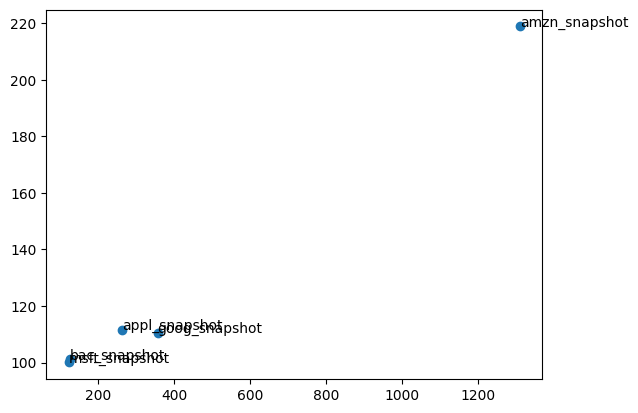

In [215]:
def averages(df):
    spread = ((df['Ask Price 1'] - df['Bid Price 1'])).mean()
    gap = (df['Ask Price 2'] - df['Ask Price 1']).mean()
    return spread, gap

rows = []

for name in names:
    spread, gap = averages(snapshots[name])
    rows.append({
        "ticker": name,
        "spread": spread,
        "gap": gap
    })

gap_df = pd.DataFrame(rows)
display(gap_df)
import plotly as plotly
fig = plotly.plot(gap_df, kind = 'scatter', x = 'spread', y = 'gap', text = 'ticker', color = 'gap')
# fig.write_image('plot1.pdf')
plt.scatter(gap_df['spread'], gap_df['gap'], label = 'Inline label')

for i, txt in enumerate(gap_df['ticker']):
    plt.annotate(txt, (gap_df['spread'][i], gap_df['gap'][i]))
